**Objective -** The main objective of this project is to build a text classifier using CNN which takes text as the input and predicts the label.

**Dataset details –** The dataset contains 20,000 (Approx) newsgroup documents from 20 different newsgroups. The dataset is of size 46 MB approximately.

**Source -** *https://archive.ics.uci.edu/dataset/113/twenty+newsgroups*

**Research Question –** Convolution Neural Networks are usually used for image processing. So, for this study I am going to analyze if it can also be used for processing text.

**Approach** <br>
*   The data here contains in the form of text files and does not contain any tabular format data.<br>
*	The text documents are first cleaned and processed using python regex which involves removing punctuations, converting non-English words to English etc.,<br>
*	The cleaned text documents are then vectorized.<br>
*	We use pre-trained glove vectors for vectorizing the text.<br>
*	CNN architectures are built and are trained using the above vectorized documents.<br>
*	Results are evaluated for the train, test datasets.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
os.getcwd()

'/Users/sri/Downloads/Project_606/CNN_Preprocessing'

In [3]:
!unzip /Users/sri/Downloads/Project_606/CNN_Preprocessing/Documents.zip

Archive:  /Users/sri/Downloads/Project_606/CNN_Preprocessing/Documents.zip
   creating: 20_newsgroups/
   creating: 20_newsgroups/rec.autos/
  inflating: 20_newsgroups/rec.autos/103203  
  inflating: 20_newsgroups/rec.autos/101674  
  inflating: 20_newsgroups/rec.autos/101589  
  inflating: 20_newsgroups/rec.autos/101615  
  inflating: 20_newsgroups/rec.autos/101679  
  inflating: 20_newsgroups/rec.autos/103536  
  inflating: 20_newsgroups/rec.autos/101593  
  inflating: 20_newsgroups/rec.autos/103143  
  inflating: 20_newsgroups/rec.autos/103663  
  inflating: 20_newsgroups/rec.autos/103361  
  inflating: 20_newsgroups/rec.autos/103054  
  inflating: 20_newsgroups/rec.autos/102969  
  inflating: 20_newsgroups/rec.autos/103226  
  inflating: 20_newsgroups/rec.autos/102947  
  inflating: 20_newsgroups/rec.autos/102865  
  inflating: 20_newsgroups/rec.autos/103378  
  inflating: 20_newsgroups/rec.autos/101579  
  inflating: 20_newsgroups/rec.autos/103207  
  inflating: 20_newsgroups/rec.

  inflating: 20_newsgroups/rec.autos/103135  
  inflating: 20_newsgroups/rec.autos/101640  
  inflating: 20_newsgroups/rec.autos/103300  
  inflating: 20_newsgroups/rec.autos/103416  
  inflating: 20_newsgroups/rec.autos/103768  
  inflating: 20_newsgroups/rec.autos/103293  
  inflating: 20_newsgroups/rec.autos/103709  
  inflating: 20_newsgroups/rec.autos/101610  
  inflating: 20_newsgroups/rec.autos/102753  
  inflating: 20_newsgroups/rec.autos/103508  
  inflating: 20_newsgroups/rec.autos/102912  
  inflating: 20_newsgroups/rec.autos/102841  
  inflating: 20_newsgroups/rec.autos/103012  
  inflating: 20_newsgroups/rec.autos/101642  
  inflating: 20_newsgroups/rec.autos/102817  
  inflating: 20_newsgroups/rec.autos/102733  
  inflating: 20_newsgroups/rec.autos/103528  
  inflating: 20_newsgroups/rec.autos/103812  
  inflating: 20_newsgroups/rec.autos/102960  
  inflating: 20_newsgroups/rec.autos/102782  
  inflating: 20_newsgroups/rec.autos/103150  
  inflating: 20_newsgroups/rec.aut

  inflating: 20_newsgroups/rec.autos/102842  
  inflating: 20_newsgroups/rec.autos/103760  
  inflating: 20_newsgroups/rec.autos/101581  
  inflating: 20_newsgroups/rec.autos/102757  
  inflating: 20_newsgroups/rec.autos/102755  
  inflating: 20_newsgroups/rec.autos/103190  
  inflating: 20_newsgroups/rec.autos/101647  
  inflating: 20_newsgroups/rec.autos/103235  
  inflating: 20_newsgroups/rec.autos/102810  
  inflating: 20_newsgroups/rec.autos/103070  
  inflating: 20_newsgroups/rec.autos/103521  
  inflating: 20_newsgroups/rec.autos/103205  
  inflating: 20_newsgroups/rec.autos/103683  
  inflating: 20_newsgroups/rec.autos/103382  
  inflating: 20_newsgroups/rec.autos/103320  
  inflating: 20_newsgroups/rec.autos/103757  
  inflating: 20_newsgroups/rec.autos/103191  
  inflating: 20_newsgroups/rec.autos/103237  
  inflating: 20_newsgroups/rec.autos/102769  
  inflating: 20_newsgroups/rec.autos/102813  
  inflating: 20_newsgroups/rec.autos/101597  
  inflating: 20_newsgroups/rec.aut

  inflating: 20_newsgroups/rec.autos/103371  
  inflating: 20_newsgroups/rec.autos/103141  
  inflating: 20_newsgroups/rec.autos/103684  
  inflating: 20_newsgroups/rec.autos/102985  
  inflating: 20_newsgroups/rec.autos/103499  
  inflating: 20_newsgroups/rec.autos/102874  
  inflating: 20_newsgroups/rec.autos/103201  
  inflating: 20_newsgroups/rec.autos/102801  
  inflating: 20_newsgroups/rec.autos/101601  
  inflating: 20_newsgroups/rec.autos/102887  
  inflating: 20_newsgroups/rec.autos/103279  
  inflating: 20_newsgroups/rec.autos/102881  
  inflating: 20_newsgroups/rec.autos/103495  
  inflating: 20_newsgroups/rec.autos/103381  
  inflating: 20_newsgroups/rec.autos/103448  
  inflating: 20_newsgroups/rec.autos/103662  
  inflating: 20_newsgroups/rec.autos/101609  
  inflating: 20_newsgroups/rec.autos/103223  
  inflating: 20_newsgroups/rec.autos/103048  
  inflating: 20_newsgroups/rec.autos/101580  
  inflating: 20_newsgroups/rec.autos/103230  
  inflating: 20_newsgroups/rec.aut

  inflating: 20_newsgroups/sci.electronics/53732  
  inflating: 20_newsgroups/sci.electronics/52730  
  inflating: 20_newsgroups/sci.electronics/53514  
  inflating: 20_newsgroups/sci.electronics/54296  
  inflating: 20_newsgroups/sci.electronics/53867  
  inflating: 20_newsgroups/sci.electronics/53711  
  inflating: 20_newsgroups/sci.electronics/53751  
  inflating: 20_newsgroups/sci.electronics/53645  
  inflating: 20_newsgroups/sci.electronics/54103  
  inflating: 20_newsgroups/sci.electronics/53540  
  inflating: 20_newsgroups/sci.electronics/53925  
  inflating: 20_newsgroups/sci.electronics/53939  
  inflating: 20_newsgroups/sci.electronics/53968  
  inflating: 20_newsgroups/sci.electronics/54213  
  inflating: 20_newsgroups/sci.electronics/54312  
  inflating: 20_newsgroups/sci.electronics/53926  
  inflating: 20_newsgroups/sci.electronics/53697  
  inflating: 20_newsgroups/sci.electronics/53792  
  inflating: 20_newsgroups/sci.electronics/54340  
  inflating: 20_newsgroups/sci.

  inflating: 20_newsgroups/sci.electronics/53632  
  inflating: 20_newsgroups/sci.electronics/53693  
  inflating: 20_newsgroups/sci.electronics/53897  
  inflating: 20_newsgroups/sci.electronics/54008  
  inflating: 20_newsgroups/sci.electronics/53569  
  inflating: 20_newsgroups/sci.electronics/53721  
  inflating: 20_newsgroups/sci.electronics/54274  
  inflating: 20_newsgroups/sci.electronics/54045  
  inflating: 20_newsgroups/sci.electronics/53857  
  inflating: 20_newsgroups/sci.electronics/53853  
  inflating: 20_newsgroups/sci.electronics/53975  
  inflating: 20_newsgroups/sci.electronics/53746  
  inflating: 20_newsgroups/sci.electronics/54068  
  inflating: 20_newsgroups/sci.electronics/53894  
  inflating: 20_newsgroups/sci.electronics/53812  
  inflating: 20_newsgroups/sci.electronics/54146  
  inflating: 20_newsgroups/sci.electronics/52742  
  inflating: 20_newsgroups/sci.electronics/54181  
  inflating: 20_newsgroups/sci.electronics/53582  
  inflating: 20_newsgroups/sci.

  inflating: 20_newsgroups/comp.os.ms-windows.misc/10835  
  inflating: 20_newsgroups/comp.os.ms-windows.misc/10014  
  inflating: 20_newsgroups/comp.os.ms-windows.misc/9820  
  inflating: 20_newsgroups/comp.os.ms-windows.misc/9684  
  inflating: 20_newsgroups/comp.os.ms-windows.misc/9659  
  inflating: 20_newsgroups/comp.os.ms-windows.misc/9921  
  inflating: 20_newsgroups/comp.os.ms-windows.misc/9841  
  inflating: 20_newsgroups/comp.os.ms-windows.misc/9786  
  inflating: 20_newsgroups/comp.os.ms-windows.misc/10795  
  inflating: 20_newsgroups/comp.os.ms-windows.misc/10182  
  inflating: 20_newsgroups/comp.os.ms-windows.misc/9604  
  inflating: 20_newsgroups/comp.os.ms-windows.misc/9928  
  inflating: 20_newsgroups/comp.os.ms-windows.misc/10843  
  inflating: 20_newsgroups/comp.os.ms-windows.misc/9955  
  inflating: 20_newsgroups/comp.os.ms-windows.misc/9638  
  inflating: 20_newsgroups/comp.os.ms-windows.misc/9962  
  inflating: 20_newsgroups/comp.os.ms-windows.misc/9691  
  inflati

  inflating: 20_newsgroups/comp.os.ms-windows.misc/9540  
  inflating: 20_newsgroups/comp.os.ms-windows.misc/9927  
  inflating: 20_newsgroups/comp.os.ms-windows.misc/9877  
  inflating: 20_newsgroups/comp.os.ms-windows.misc/10138  
  inflating: 20_newsgroups/comp.os.ms-windows.misc/9481  
  inflating: 20_newsgroups/comp.os.ms-windows.misc/10728  
  inflating: 20_newsgroups/comp.os.ms-windows.misc/10661  
  inflating: 20_newsgroups/comp.os.ms-windows.misc/10867  
  inflating: 20_newsgroups/comp.os.ms-windows.misc/9704  
  inflating: 20_newsgroups/comp.os.ms-windows.misc/9946  
  inflating: 20_newsgroups/comp.os.ms-windows.misc/9900  
  inflating: 20_newsgroups/comp.os.ms-windows.misc/9812  
  inflating: 20_newsgroups/comp.os.ms-windows.misc/10821  
  inflating: 20_newsgroups/comp.os.ms-windows.misc/9612  
  inflating: 20_newsgroups/comp.os.ms-windows.misc/10724  
  inflating: 20_newsgroups/comp.os.ms-windows.misc/9823  
  inflating: 20_newsgroups/comp.os.ms-windows.misc/9578  
  inflat

  inflating: 20_newsgroups/sci.med/59239  
  inflating: 20_newsgroups/sci.med/58054  
  inflating: 20_newsgroups/sci.med/58786  
  inflating: 20_newsgroups/sci.med/59366  
  inflating: 20_newsgroups/sci.med/59053  
  inflating: 20_newsgroups/sci.med/59454  
  inflating: 20_newsgroups/sci.med/58759  
  inflating: 20_newsgroups/sci.med/58144  
  inflating: 20_newsgroups/sci.med/58949  
  inflating: 20_newsgroups/sci.med/59320  
  inflating: 20_newsgroups/sci.med/58101  
  inflating: 20_newsgroups/sci.med/59254  
  inflating: 20_newsgroups/sci.med/58093  
  inflating: 20_newsgroups/sci.med/59131  
  inflating: 20_newsgroups/sci.med/59220  
  inflating: 20_newsgroups/sci.med/58828  
  inflating: 20_newsgroups/sci.med/58922  
  inflating: 20_newsgroups/sci.med/59481  
  inflating: 20_newsgroups/sci.med/59563  
  inflating: 20_newsgroups/sci.med/58919  
  inflating: 20_newsgroups/sci.med/58072  
  inflating: 20_newsgroups/sci.med/59170  
  inflating: 20_newsgroups/sci.med/58932  
  inflating

  inflating: 20_newsgroups/sci.med/58117  
  inflating: 20_newsgroups/sci.med/59615  
  inflating: 20_newsgroups/sci.med/59424  
  inflating: 20_newsgroups/sci.med/58143  
  inflating: 20_newsgroups/sci.med/58148  
  inflating: 20_newsgroups/sci.med/58821  
  inflating: 20_newsgroups/sci.med/59297  
  inflating: 20_newsgroups/sci.med/58785  
  inflating: 20_newsgroups/sci.med/59069  
  inflating: 20_newsgroups/sci.med/58100  
  inflating: 20_newsgroups/sci.med/59296  
  inflating: 20_newsgroups/sci.med/59227  
  inflating: 20_newsgroups/sci.med/59646  
  inflating: 20_newsgroups/sci.med/59425  
  inflating: 20_newsgroups/sci.med/59483  
  inflating: 20_newsgroups/sci.med/59450  
  inflating: 20_newsgroups/sci.med/59640  
  inflating: 20_newsgroups/sci.med/58878  
  inflating: 20_newsgroups/sci.med/59625  
  inflating: 20_newsgroups/sci.med/58978  
  inflating: 20_newsgroups/sci.med/59571  
  inflating: 20_newsgroups/sci.med/59342  
  inflating: 20_newsgroups/sci.med/58964  
  inflating

  inflating: 20_newsgroups/sci.med/59500  
  inflating: 20_newsgroups/sci.med/58918  
  inflating: 20_newsgroups/sci.med/59387  
  inflating: 20_newsgroups/sci.med/59384  
  inflating: 20_newsgroups/sci.med/59165  
  inflating: 20_newsgroups/sci.med/59103  
  inflating: 20_newsgroups/sci.med/59439  
  inflating: 20_newsgroups/sci.med/59321  
  inflating: 20_newsgroups/sci.med/58899  
  inflating: 20_newsgroups/sci.med/59465  
  inflating: 20_newsgroups/sci.med/59232  
  inflating: 20_newsgroups/sci.med/59499  
  inflating: 20_newsgroups/sci.med/59000  
  inflating: 20_newsgroups/sci.med/59031  
  inflating: 20_newsgroups/sci.med/59617  
  inflating: 20_newsgroups/sci.med/59587  
  inflating: 20_newsgroups/sci.med/58864  
  inflating: 20_newsgroups/sci.med/59179  
  inflating: 20_newsgroups/sci.med/59096  
  inflating: 20_newsgroups/sci.med/59270  
  inflating: 20_newsgroups/sci.med/59305  
  inflating: 20_newsgroups/sci.med/59290  
  inflating: 20_newsgroups/sci.med/59601  
  inflating

  inflating: 20_newsgroups/rec.motorcycles/104585  
  inflating: 20_newsgroups/rec.motorcycles/104696  
  inflating: 20_newsgroups/rec.motorcycles/104466  
  inflating: 20_newsgroups/rec.motorcycles/104800  
  inflating: 20_newsgroups/rec.motorcycles/103193  
  inflating: 20_newsgroups/rec.motorcycles/104855  
  inflating: 20_newsgroups/rec.motorcycles/104714  
  inflating: 20_newsgroups/rec.motorcycles/104753  
  inflating: 20_newsgroups/rec.motorcycles/104817  
  inflating: 20_newsgroups/rec.motorcycles/104400  
  inflating: 20_newsgroups/rec.motorcycles/104762  
  inflating: 20_newsgroups/rec.motorcycles/104682  
  inflating: 20_newsgroups/rec.motorcycles/105150  
  inflating: 20_newsgroups/rec.motorcycles/103195  
  inflating: 20_newsgroups/rec.motorcycles/104609  
  inflating: 20_newsgroups/rec.motorcycles/104892  
  inflating: 20_newsgroups/rec.motorcycles/104647  
  inflating: 20_newsgroups/rec.motorcycles/103122  
  inflating: 20_newsgroups/rec.motorcycles/104913  
  inflating:

  inflating: 20_newsgroups/rec.motorcycles/104338  
  inflating: 20_newsgroups/rec.motorcycles/105242  
  inflating: 20_newsgroups/rec.motorcycles/104813  
  inflating: 20_newsgroups/rec.motorcycles/104374  
  inflating: 20_newsgroups/rec.motorcycles/104306  
  inflating: 20_newsgroups/rec.motorcycles/103180  
  inflating: 20_newsgroups/rec.motorcycles/104383  
  inflating: 20_newsgroups/rec.motorcycles/104456  
  inflating: 20_newsgroups/rec.motorcycles/104852  
  inflating: 20_newsgroups/rec.motorcycles/104514  
  inflating: 20_newsgroups/rec.motorcycles/104836  
  inflating: 20_newsgroups/rec.motorcycles/104484  
  inflating: 20_newsgroups/rec.motorcycles/104499  
  inflating: 20_newsgroups/rec.motorcycles/104638  
  inflating: 20_newsgroups/rec.motorcycles/104625  
  inflating: 20_newsgroups/rec.motorcycles/104966  
  inflating: 20_newsgroups/rec.motorcycles/103141  
  inflating: 20_newsgroups/rec.motorcycles/104513  
  inflating: 20_newsgroups/rec.motorcycles/104613  
  inflating:

  inflating: 20_newsgroups/misc.forsale/76033  
  inflating: 20_newsgroups/misc.forsale/76118  
  inflating: 20_newsgroups/misc.forsale/76553  
  inflating: 20_newsgroups/misc.forsale/76577  
  inflating: 20_newsgroups/misc.forsale/76187  
  inflating: 20_newsgroups/misc.forsale/74768  
  inflating: 20_newsgroups/misc.forsale/76221  
  inflating: 20_newsgroups/misc.forsale/74726  
  inflating: 20_newsgroups/misc.forsale/75966  
  inflating: 20_newsgroups/misc.forsale/76111  
  inflating: 20_newsgroups/misc.forsale/74774  
  inflating: 20_newsgroups/misc.forsale/76463  
  inflating: 20_newsgroups/misc.forsale/76168  
  inflating: 20_newsgroups/misc.forsale/76564  
  inflating: 20_newsgroups/misc.forsale/75933  
  inflating: 20_newsgroups/misc.forsale/76790  
  inflating: 20_newsgroups/misc.forsale/74809  
  inflating: 20_newsgroups/misc.forsale/76515  
  inflating: 20_newsgroups/misc.forsale/74814  
  inflating: 20_newsgroups/misc.forsale/76862  
  inflating: 20_newsgroups/misc.forsale/

  inflating: 20_newsgroups/misc.forsale/76351  
  inflating: 20_newsgroups/misc.forsale/76865  
  inflating: 20_newsgroups/misc.forsale/75956  
  inflating: 20_newsgroups/misc.forsale/76672  
  inflating: 20_newsgroups/misc.forsale/76420  
  inflating: 20_newsgroups/misc.forsale/75999  
  inflating: 20_newsgroups/misc.forsale/75997  
  inflating: 20_newsgroups/misc.forsale/75914  
  inflating: 20_newsgroups/misc.forsale/76606  
  inflating: 20_newsgroups/misc.forsale/76464  
  inflating: 20_newsgroups/misc.forsale/76937  
  inflating: 20_newsgroups/misc.forsale/76786  
  inflating: 20_newsgroups/misc.forsale/76176  
  inflating: 20_newsgroups/misc.forsale/74827  
  inflating: 20_newsgroups/misc.forsale/76419  
  inflating: 20_newsgroups/misc.forsale/75918  
  inflating: 20_newsgroups/misc.forsale/76568  
  inflating: 20_newsgroups/misc.forsale/76465  
  inflating: 20_newsgroups/misc.forsale/76489  
  inflating: 20_newsgroups/misc.forsale/75903  
  inflating: 20_newsgroups/misc.forsale/

  inflating: 20_newsgroups/alt.atheism/53504  
  inflating: 20_newsgroups/alt.atheism/54235  
  inflating: 20_newsgroups/alt.atheism/53338  
  inflating: 20_newsgroups/alt.atheism/51232  
  inflating: 20_newsgroups/alt.atheism/53806  
  inflating: 20_newsgroups/alt.atheism/53554  
  inflating: 20_newsgroups/alt.atheism/53508  
  inflating: 20_newsgroups/alt.atheism/53583  
  inflating: 20_newsgroups/alt.atheism/53454  
  inflating: 20_newsgroups/alt.atheism/54218  
  inflating: 20_newsgroups/alt.atheism/51155  
  inflating: 20_newsgroups/alt.atheism/53483  
  inflating: 20_newsgroups/alt.atheism/53283  
  inflating: 20_newsgroups/alt.atheism/51239  
  inflating: 20_newsgroups/alt.atheism/51287  
  inflating: 20_newsgroups/alt.atheism/53660  
  inflating: 20_newsgroups/alt.atheism/54194  
  inflating: 20_newsgroups/alt.atheism/51211  
  inflating: 20_newsgroups/alt.atheism/53761  
  inflating: 20_newsgroups/alt.atheism/53278  
  inflating: 20_newsgroups/alt.atheism/53061  
  inflating: 

  inflating: 20_newsgroups/alt.atheism/53416  
  inflating: 20_newsgroups/alt.atheism/53372  
  inflating: 20_newsgroups/alt.atheism/53491  
  inflating: 20_newsgroups/alt.atheism/53446  
  inflating: 20_newsgroups/alt.atheism/53276  
  inflating: 20_newsgroups/alt.atheism/53234  
  inflating: 20_newsgroups/alt.atheism/53307  
  inflating: 20_newsgroups/alt.atheism/53551  
  inflating: 20_newsgroups/alt.atheism/51213  
  inflating: 20_newsgroups/alt.atheism/53203  
  inflating: 20_newsgroups/alt.atheism/51223  
  inflating: 20_newsgroups/alt.atheism/53459  
  inflating: 20_newsgroups/alt.atheism/53507  
  inflating: 20_newsgroups/alt.atheism/53122  
  inflating: 20_newsgroups/alt.atheism/53261  
  inflating: 20_newsgroups/alt.atheism/51167  
  inflating: 20_newsgroups/alt.atheism/53119  
  inflating: 20_newsgroups/alt.atheism/53434  
  inflating: 20_newsgroups/alt.atheism/53422  
  inflating: 20_newsgroups/alt.atheism/53455  
  inflating: 20_newsgroups/alt.atheism/53250  
  inflating: 

  inflating: 20_newsgroups/talk.politics.misc/178501  
  inflating: 20_newsgroups/talk.politics.misc/178695  
  inflating: 20_newsgroups/talk.politics.misc/176988  
  inflating: 20_newsgroups/talk.politics.misc/179069  
  inflating: 20_newsgroups/talk.politics.misc/179054  
  inflating: 20_newsgroups/talk.politics.misc/178866  
  inflating: 20_newsgroups/talk.politics.misc/176916  
  inflating: 20_newsgroups/talk.politics.misc/177023  
  inflating: 20_newsgroups/talk.politics.misc/178469  
  inflating: 20_newsgroups/talk.politics.misc/178533  
  inflating: 20_newsgroups/talk.politics.misc/178373  
  inflating: 20_newsgroups/talk.politics.misc/176987  
  inflating: 20_newsgroups/talk.politics.misc/178717  
  inflating: 20_newsgroups/talk.politics.misc/178890  
  inflating: 20_newsgroups/talk.politics.misc/178603  
  inflating: 20_newsgroups/talk.politics.misc/176981  
  inflating: 20_newsgroups/talk.politics.misc/178996  
  inflating: 20_newsgroups/talk.politics.misc/176856  
  inflatin

  inflating: 20_newsgroups/talk.politics.misc/178826  
  inflating: 20_newsgroups/talk.politics.misc/179013  
  inflating: 20_newsgroups/talk.politics.misc/178864  
  inflating: 20_newsgroups/talk.politics.misc/178701  
  inflating: 20_newsgroups/talk.politics.misc/178537  
  inflating: 20_newsgroups/talk.politics.misc/178430  
  inflating: 20_newsgroups/talk.politics.misc/178413  
  inflating: 20_newsgroups/talk.politics.misc/179074  
  inflating: 20_newsgroups/talk.politics.misc/178647  
  inflating: 20_newsgroups/talk.politics.misc/176909  
  inflating: 20_newsgroups/talk.politics.misc/178362  
  inflating: 20_newsgroups/talk.politics.misc/178578  
  inflating: 20_newsgroups/talk.politics.misc/178991  
  inflating: 20_newsgroups/talk.politics.misc/179106  
  inflating: 20_newsgroups/talk.politics.misc/178994  
  inflating: 20_newsgroups/talk.politics.misc/178657  
  inflating: 20_newsgroups/talk.politics.misc/179075  
  inflating: 20_newsgroups/talk.politics.misc/178638  
  inflatin

  inflating: 20_newsgroups/sci.crypt/15408  
  inflating: 20_newsgroups/sci.crypt/15841  
  inflating: 20_newsgroups/sci.crypt/15825  
  inflating: 20_newsgroups/sci.crypt/16147  
  inflating: 20_newsgroups/sci.crypt/15214  
  inflating: 20_newsgroups/sci.crypt/14994  
  inflating: 20_newsgroups/sci.crypt/15514  
  inflating: 20_newsgroups/sci.crypt/15847  
  inflating: 20_newsgroups/sci.crypt/15376  
  inflating: 20_newsgroups/sci.crypt/16117  
  inflating: 20_newsgroups/sci.crypt/15419  
  inflating: 20_newsgroups/sci.crypt/15219  
  inflating: 20_newsgroups/sci.crypt/15566  
  inflating: 20_newsgroups/sci.crypt/15946  
  inflating: 20_newsgroups/sci.crypt/15472  
  inflating: 20_newsgroups/sci.crypt/15880  
  inflating: 20_newsgroups/sci.crypt/15235  
  inflating: 20_newsgroups/sci.crypt/16132  
  inflating: 20_newsgroups/sci.crypt/15558  
  inflating: 20_newsgroups/sci.crypt/16019  
  inflating: 20_newsgroups/sci.crypt/15197  
  inflating: 20_newsgroups/sci.crypt/14986  
  inflatin

  inflating: 20_newsgroups/sci.crypt/15178  
  inflating: 20_newsgroups/sci.crypt/15935  
  inflating: 20_newsgroups/sci.crypt/15752  
  inflating: 20_newsgroups/sci.crypt/15457  
  inflating: 20_newsgroups/sci.crypt/15406  
  inflating: 20_newsgroups/sci.crypt/15763  
  inflating: 20_newsgroups/sci.crypt/16082  
  inflating: 20_newsgroups/sci.crypt/15347  
  inflating: 20_newsgroups/sci.crypt/15720  
  inflating: 20_newsgroups/sci.crypt/15325  
  inflating: 20_newsgroups/sci.crypt/15753  
  inflating: 20_newsgroups/sci.crypt/15298  
  inflating: 20_newsgroups/sci.crypt/15326  
  inflating: 20_newsgroups/sci.crypt/15471  
  inflating: 20_newsgroups/sci.crypt/16028  
  inflating: 20_newsgroups/sci.crypt/15974  
  inflating: 20_newsgroups/sci.crypt/15902  
  inflating: 20_newsgroups/sci.crypt/15293  
  inflating: 20_newsgroups/sci.crypt/15991  
  inflating: 20_newsgroups/sci.crypt/15900  
  inflating: 20_newsgroups/sci.crypt/15396  
  inflating: 20_newsgroups/sci.crypt/15723  
  inflatin

  inflating: 20_newsgroups/sci.crypt/16355  
  inflating: 20_newsgroups/sci.crypt/15374  
  inflating: 20_newsgroups/sci.crypt/15869  
  inflating: 20_newsgroups/sci.crypt/15616  
  inflating: 20_newsgroups/sci.crypt/15673  
  inflating: 20_newsgroups/sci.crypt/15627  
  inflating: 20_newsgroups/sci.crypt/16002  
  inflating: 20_newsgroups/sci.crypt/16069  
  inflating: 20_newsgroups/sci.crypt/15282  
  inflating: 20_newsgroups/sci.crypt/15618  
  inflating: 20_newsgroups/sci.crypt/15862  
  inflating: 20_newsgroups/sci.crypt/15417  
  inflating: 20_newsgroups/sci.crypt/15448  
  inflating: 20_newsgroups/sci.crypt/15215  
  inflating: 20_newsgroups/sci.crypt/15210  
  inflating: 20_newsgroups/sci.crypt/15486  
  inflating: 20_newsgroups/sci.crypt/15937  
  inflating: 20_newsgroups/sci.crypt/16150  
  inflating: 20_newsgroups/sci.crypt/15695  
  inflating: 20_newsgroups/sci.crypt/16092  
  inflating: 20_newsgroups/sci.crypt/15890  
  inflating: 20_newsgroups/sci.crypt/16023  
  inflatin

  inflating: 20_newsgroups/rec.sport.hockey/54759  
  inflating: 20_newsgroups/rec.sport.hockey/54031  
  inflating: 20_newsgroups/rec.sport.hockey/53756  
  inflating: 20_newsgroups/rec.sport.hockey/53677  
  inflating: 20_newsgroups/rec.sport.hockey/54076  
  inflating: 20_newsgroups/rec.sport.hockey/53838  
  inflating: 20_newsgroups/rec.sport.hockey/53642  
  inflating: 20_newsgroups/rec.sport.hockey/54040  
  inflating: 20_newsgroups/rec.sport.hockey/53971  
  inflating: 20_newsgroups/rec.sport.hockey/54046  
  inflating: 20_newsgroups/rec.sport.hockey/53882  
  inflating: 20_newsgroups/rec.sport.hockey/53757  
  inflating: 20_newsgroups/rec.sport.hockey/53688  
  inflating: 20_newsgroups/rec.sport.hockey/54011  
  inflating: 20_newsgroups/rec.sport.hockey/54228  
  inflating: 20_newsgroups/rec.sport.hockey/54289  
  inflating: 20_newsgroups/rec.sport.hockey/53950  
  inflating: 20_newsgroups/rec.sport.hockey/53958  
  inflating: 20_newsgroups/rec.sport.hockey/53704  
  inflating:

  inflating: 20_newsgroups/rec.sport.hockey/53599  
  inflating: 20_newsgroups/rec.sport.hockey/52627  
  inflating: 20_newsgroups/rec.sport.hockey/54070  
  inflating: 20_newsgroups/rec.sport.hockey/52607  
  inflating: 20_newsgroups/rec.sport.hockey/54073  
  inflating: 20_newsgroups/rec.sport.hockey/52608  
  inflating: 20_newsgroups/rec.sport.hockey/53707  
  inflating: 20_newsgroups/rec.sport.hockey/53555  
  inflating: 20_newsgroups/rec.sport.hockey/52629  
  inflating: 20_newsgroups/rec.sport.hockey/54283  
  inflating: 20_newsgroups/rec.sport.hockey/54159  
  inflating: 20_newsgroups/rec.sport.hockey/54754  
  inflating: 20_newsgroups/rec.sport.hockey/53588  
  inflating: 20_newsgroups/rec.sport.hockey/53558  
  inflating: 20_newsgroups/rec.sport.hockey/53679  
  inflating: 20_newsgroups/rec.sport.hockey/53667  
  inflating: 20_newsgroups/rec.sport.hockey/54546  
  inflating: 20_newsgroups/rec.sport.hockey/53662  
  inflating: 20_newsgroups/rec.sport.hockey/53683  
  inflating:

  inflating: 20_newsgroups/talk.religion.misc/82765  
  inflating: 20_newsgroups/talk.religion.misc/84400  
  inflating: 20_newsgroups/talk.religion.misc/83674  
  inflating: 20_newsgroups/talk.religion.misc/83982  
  inflating: 20_newsgroups/talk.religion.misc/83861  
  inflating: 20_newsgroups/talk.religion.misc/83703  
  inflating: 20_newsgroups/talk.religion.misc/83707  
  inflating: 20_newsgroups/talk.religion.misc/84003  
  inflating: 20_newsgroups/talk.religion.misc/84215  
  inflating: 20_newsgroups/talk.religion.misc/83469  
  inflating: 20_newsgroups/talk.religion.misc/83779  
  inflating: 20_newsgroups/talk.religion.misc/83687  
  inflating: 20_newsgroups/talk.religion.misc/83503  
  inflating: 20_newsgroups/talk.religion.misc/82815  
  inflating: 20_newsgroups/talk.religion.misc/83453  
  inflating: 20_newsgroups/talk.religion.misc/84069  
  inflating: 20_newsgroups/talk.religion.misc/84340  
  inflating: 20_newsgroups/talk.religion.misc/83607  
  inflating: 20_newsgroups/t

  inflating: 20_newsgroups/talk.religion.misc/83866  
  inflating: 20_newsgroups/talk.religion.misc/83942  
  inflating: 20_newsgroups/talk.religion.misc/83702  
  inflating: 20_newsgroups/talk.religion.misc/84267  
  inflating: 20_newsgroups/talk.religion.misc/84312  
  inflating: 20_newsgroups/talk.religion.misc/82784  
  inflating: 20_newsgroups/talk.religion.misc/82794  
  inflating: 20_newsgroups/talk.religion.misc/83845  
  inflating: 20_newsgroups/talk.religion.misc/83616  
  inflating: 20_newsgroups/talk.religion.misc/83632  
  inflating: 20_newsgroups/talk.religion.misc/83958  
  inflating: 20_newsgroups/talk.religion.misc/83509  
  inflating: 20_newsgroups/talk.religion.misc/82764  
  inflating: 20_newsgroups/talk.religion.misc/84134  
  inflating: 20_newsgroups/talk.religion.misc/83620  
  inflating: 20_newsgroups/talk.religion.misc/84290  
  inflating: 20_newsgroups/talk.religion.misc/84285  
  inflating: 20_newsgroups/talk.religion.misc/84249  
  inflating: 20_newsgroups/t

  inflating: 20_newsgroups/comp.graphics/39071  
  inflating: 20_newsgroups/comp.graphics/38925  
  inflating: 20_newsgroups/comp.graphics/38651  
  inflating: 20_newsgroups/comp.graphics/39637  
  inflating: 20_newsgroups/comp.graphics/38931  
  inflating: 20_newsgroups/comp.graphics/37933  
  inflating: 20_newsgroups/comp.graphics/38589  
  inflating: 20_newsgroups/comp.graphics/37961  
  inflating: 20_newsgroups/comp.graphics/37928  
  inflating: 20_newsgroups/comp.graphics/40062  
  inflating: 20_newsgroups/comp.graphics/38236  
  inflating: 20_newsgroups/comp.graphics/38525  
  inflating: 20_newsgroups/comp.graphics/39040  
  inflating: 20_newsgroups/comp.graphics/38703  
  inflating: 20_newsgroups/comp.graphics/38862  
  inflating: 20_newsgroups/comp.graphics/38856  
  inflating: 20_newsgroups/comp.graphics/38587  
  inflating: 20_newsgroups/comp.graphics/38812  
  inflating: 20_newsgroups/comp.graphics/38554  
  inflating: 20_newsgroups/comp.graphics/37944  
  inflating: 20_news

  inflating: 20_newsgroups/comp.graphics/38450  
  inflating: 20_newsgroups/comp.graphics/38900  
  inflating: 20_newsgroups/comp.graphics/38335  
  inflating: 20_newsgroups/comp.graphics/39081  
  inflating: 20_newsgroups/comp.graphics/38850  
  inflating: 20_newsgroups/comp.graphics/38334  
  inflating: 20_newsgroups/comp.graphics/38992  
  inflating: 20_newsgroups/comp.graphics/38770  
  inflating: 20_newsgroups/comp.graphics/38515  
  inflating: 20_newsgroups/comp.graphics/38908  
  inflating: 20_newsgroups/comp.graphics/38296  
  inflating: 20_newsgroups/comp.graphics/38987  
  inflating: 20_newsgroups/comp.graphics/38938  
  inflating: 20_newsgroups/comp.graphics/38725  
  inflating: 20_newsgroups/comp.graphics/38948  
  inflating: 20_newsgroups/comp.graphics/38906  
  inflating: 20_newsgroups/comp.graphics/38344  
  inflating: 20_newsgroups/comp.graphics/38955  
  inflating: 20_newsgroups/comp.graphics/37913  
  inflating: 20_newsgroups/comp.graphics/39079  
  inflating: 20_news

  inflating: 20_newsgroups/soc.religion.christian/20640  
  inflating: 20_newsgroups/soc.religion.christian/21413  
  inflating: 20_newsgroups/soc.religion.christian/21717  
  inflating: 20_newsgroups/soc.religion.christian/20691  
  inflating: 20_newsgroups/soc.religion.christian/20495  
  inflating: 20_newsgroups/soc.religion.christian/21793  
  inflating: 20_newsgroups/soc.religion.christian/20775  
  inflating: 20_newsgroups/soc.religion.christian/21585  
  inflating: 20_newsgroups/soc.religion.christian/20680  
  inflating: 20_newsgroups/soc.religion.christian/20908  
  inflating: 20_newsgroups/soc.religion.christian/20970  
  inflating: 20_newsgroups/soc.religion.christian/20599  
  inflating: 20_newsgroups/soc.religion.christian/21732  
  inflating: 20_newsgroups/soc.religion.christian/20973  
  inflating: 20_newsgroups/soc.religion.christian/21494  
  inflating: 20_newsgroups/soc.religion.christian/20937  
  inflating: 20_newsgroups/soc.religion.christian/21560  
  inflating: 2

  inflating: 20_newsgroups/soc.religion.christian/21753  
  inflating: 20_newsgroups/soc.religion.christian/21553  
  inflating: 20_newsgroups/soc.religion.christian/20767  
  inflating: 20_newsgroups/soc.religion.christian/20562  
  inflating: 20_newsgroups/soc.religion.christian/21337  
  inflating: 20_newsgroups/soc.religion.christian/21799  
  inflating: 20_newsgroups/soc.religion.christian/20722  
  inflating: 20_newsgroups/soc.religion.christian/20724  
  inflating: 20_newsgroups/soc.religion.christian/20600  
  inflating: 20_newsgroups/soc.religion.christian/21727  
  inflating: 20_newsgroups/soc.religion.christian/20874  
  inflating: 20_newsgroups/soc.religion.christian/21513  
  inflating: 20_newsgroups/soc.religion.christian/20736  
  inflating: 20_newsgroups/soc.religion.christian/21541  
  inflating: 20_newsgroups/soc.religion.christian/20692  
  inflating: 20_newsgroups/soc.religion.christian/21763  
  inflating: 20_newsgroups/soc.religion.christian/20869  
  inflating: 2

  inflating: 20_newsgroups/soc.religion.christian/20733  
  inflating: 20_newsgroups/soc.religion.christian/21741  
  inflating: 20_newsgroups/soc.religion.christian/20597  
  inflating: 20_newsgroups/soc.religion.christian/20734  
  inflating: 20_newsgroups/soc.religion.christian/20764  
  inflating: 20_newsgroups/soc.religion.christian/20717  
  inflating: 20_newsgroups/soc.religion.christian/20596  
  inflating: 20_newsgroups/soc.religion.christian/20492  
  inflating: 20_newsgroups/soc.religion.christian/21698  
  inflating: 20_newsgroups/soc.religion.christian/21414  
  inflating: 20_newsgroups/soc.religion.christian/21626  
  inflating: 20_newsgroups/soc.religion.christian/20567  
  inflating: 20_newsgroups/soc.religion.christian/20696  
  inflating: 20_newsgroups/soc.religion.christian/21640  
  inflating: 20_newsgroups/soc.religion.christian/21434  
  inflating: 20_newsgroups/soc.religion.christian/21386  
  inflating: 20_newsgroups/soc.religion.christian/21493  
  inflating: 2

  inflating: 20_newsgroups/comp.sys.mac.hardware/51580  
  inflating: 20_newsgroups/comp.sys.mac.hardware/51975  
  inflating: 20_newsgroups/comp.sys.mac.hardware/52239  
  inflating: 20_newsgroups/comp.sys.mac.hardware/51739  
  inflating: 20_newsgroups/comp.sys.mac.hardware/51826  
  inflating: 20_newsgroups/comp.sys.mac.hardware/51801  
  inflating: 20_newsgroups/comp.sys.mac.hardware/50507  
  inflating: 20_newsgroups/comp.sys.mac.hardware/51796  
  inflating: 20_newsgroups/comp.sys.mac.hardware/52004  
  inflating: 20_newsgroups/comp.sys.mac.hardware/52146  
  inflating: 20_newsgroups/comp.sys.mac.hardware/51555  
  inflating: 20_newsgroups/comp.sys.mac.hardware/51755  
  inflating: 20_newsgroups/comp.sys.mac.hardware/52272  
  inflating: 20_newsgroups/comp.sys.mac.hardware/51836  
  inflating: 20_newsgroups/comp.sys.mac.hardware/52403  
  inflating: 20_newsgroups/comp.sys.mac.hardware/51572  
  inflating: 20_newsgroups/comp.sys.mac.hardware/51618  
  inflating: 20_newsgroups/comp

  inflating: 20_newsgroups/comp.sys.mac.hardware/52082  
  inflating: 20_newsgroups/comp.sys.mac.hardware/51704  
  inflating: 20_newsgroups/comp.sys.mac.hardware/50510  
  inflating: 20_newsgroups/comp.sys.mac.hardware/50524  
  inflating: 20_newsgroups/comp.sys.mac.hardware/52093  
  inflating: 20_newsgroups/comp.sys.mac.hardware/51656  
  inflating: 20_newsgroups/comp.sys.mac.hardware/50478  
  inflating: 20_newsgroups/comp.sys.mac.hardware/52047  
  inflating: 20_newsgroups/comp.sys.mac.hardware/51649  
  inflating: 20_newsgroups/comp.sys.mac.hardware/52100  
  inflating: 20_newsgroups/comp.sys.mac.hardware/51560  
  inflating: 20_newsgroups/comp.sys.mac.hardware/52085  
  inflating: 20_newsgroups/comp.sys.mac.hardware/51962  
  inflating: 20_newsgroups/comp.sys.mac.hardware/51608  
  inflating: 20_newsgroups/comp.sys.mac.hardware/51918  
  inflating: 20_newsgroups/comp.sys.mac.hardware/51936  
  inflating: 20_newsgroups/comp.sys.mac.hardware/51832  
  inflating: 20_newsgroups/comp

  inflating: 20_newsgroups/talk.politics.mideast/77321  
  inflating: 20_newsgroups/talk.politics.mideast/75407  
  inflating: 20_newsgroups/talk.politics.mideast/76381  
  inflating: 20_newsgroups/talk.politics.mideast/77379  
  inflating: 20_newsgroups/talk.politics.mideast/77209  
  inflating: 20_newsgroups/talk.politics.mideast/75955  
  inflating: 20_newsgroups/talk.politics.mideast/75371  
  inflating: 20_newsgroups/talk.politics.mideast/76181  
  inflating: 20_newsgroups/talk.politics.mideast/76377  
  inflating: 20_newsgroups/talk.politics.mideast/76482  
  inflating: 20_newsgroups/talk.politics.mideast/77233  
  inflating: 20_newsgroups/talk.politics.mideast/76116  
  inflating: 20_newsgroups/talk.politics.mideast/76523  
  inflating: 20_newsgroups/talk.politics.mideast/76271  
  inflating: 20_newsgroups/talk.politics.mideast/75917  
  inflating: 20_newsgroups/talk.politics.mideast/77375  
  inflating: 20_newsgroups/talk.politics.mideast/76141  
  inflating: 20_newsgroups/talk

  inflating: 20_newsgroups/talk.politics.mideast/76300  
  inflating: 20_newsgroups/talk.politics.mideast/76396  
  inflating: 20_newsgroups/talk.politics.mideast/77185  
  inflating: 20_newsgroups/talk.politics.mideast/76152  
  inflating: 20_newsgroups/talk.politics.mideast/76506  
  inflating: 20_newsgroups/talk.politics.mideast/75414  
  inflating: 20_newsgroups/talk.politics.mideast/77194  
  inflating: 20_newsgroups/talk.politics.mideast/76157  
  inflating: 20_newsgroups/talk.politics.mideast/76173  
  inflating: 20_newsgroups/talk.politics.mideast/75963  
  inflating: 20_newsgroups/talk.politics.mideast/77396  
  inflating: 20_newsgroups/talk.politics.mideast/76191  
  inflating: 20_newsgroups/talk.politics.mideast/75972  
  inflating: 20_newsgroups/talk.politics.mideast/76067  
  inflating: 20_newsgroups/talk.politics.mideast/76140  
  inflating: 20_newsgroups/talk.politics.mideast/76021  
  inflating: 20_newsgroups/talk.politics.mideast/77215  
  inflating: 20_newsgroups/talk

  inflating: 20_newsgroups/talk.politics.guns/54686  
  inflating: 20_newsgroups/talk.politics.guns/54275  
  inflating: 20_newsgroups/talk.politics.guns/54227  
  inflating: 20_newsgroups/talk.politics.guns/55070  
  inflating: 20_newsgroups/talk.politics.guns/55240  
  inflating: 20_newsgroups/talk.politics.guns/54301  
  inflating: 20_newsgroups/talk.politics.guns/54555  
  inflating: 20_newsgroups/talk.politics.guns/54282  
  inflating: 20_newsgroups/talk.politics.guns/54732  
  inflating: 20_newsgroups/talk.politics.guns/54860  
  inflating: 20_newsgroups/talk.politics.guns/54823  
  inflating: 20_newsgroups/talk.politics.guns/54247  
  inflating: 20_newsgroups/talk.politics.guns/54889  
  inflating: 20_newsgroups/talk.politics.guns/54394  
  inflating: 20_newsgroups/talk.politics.guns/53306  
  inflating: 20_newsgroups/talk.politics.guns/55066  
  inflating: 20_newsgroups/talk.politics.guns/54515  
  inflating: 20_newsgroups/talk.politics.guns/53362  
  inflating: 20_newsgroups/t

  inflating: 20_newsgroups/talk.politics.guns/54501  
  inflating: 20_newsgroups/talk.politics.guns/54871  
  inflating: 20_newsgroups/talk.politics.guns/55103  
  inflating: 20_newsgroups/talk.politics.guns/54917  
  inflating: 20_newsgroups/talk.politics.guns/54292  
  inflating: 20_newsgroups/talk.politics.guns/54516  
  inflating: 20_newsgroups/talk.politics.guns/53321  
  inflating: 20_newsgroups/talk.politics.guns/55239  
  inflating: 20_newsgroups/talk.politics.guns/55056  
  inflating: 20_newsgroups/talk.politics.guns/54771  
  inflating: 20_newsgroups/talk.politics.guns/54856  
  inflating: 20_newsgroups/talk.politics.guns/54705  
  inflating: 20_newsgroups/talk.politics.guns/53370  
  inflating: 20_newsgroups/talk.politics.guns/54492  
  inflating: 20_newsgroups/talk.politics.guns/54272  
  inflating: 20_newsgroups/talk.politics.guns/54559  
  inflating: 20_newsgroups/talk.politics.guns/55273  
  inflating: 20_newsgroups/talk.politics.guns/54887  
  inflating: 20_newsgroups/t

  inflating: 20_newsgroups/sci.space/60944  
  inflating: 20_newsgroups/sci.space/60819  
  inflating: 20_newsgroups/sci.space/61006  
  inflating: 20_newsgroups/sci.space/61141  
  inflating: 20_newsgroups/sci.space/60770  
  inflating: 20_newsgroups/sci.space/61313  
  inflating: 20_newsgroups/sci.space/61484  
  inflating: 20_newsgroups/sci.space/60979  
  inflating: 20_newsgroups/sci.space/61351  
  inflating: 20_newsgroups/sci.space/61155  
  inflating: 20_newsgroups/sci.space/60837  
  inflating: 20_newsgroups/sci.space/60804  
  inflating: 20_newsgroups/sci.space/61098  
  inflating: 20_newsgroups/sci.space/62411  
  inflating: 20_newsgroups/sci.space/62419  
  inflating: 20_newsgroups/sci.space/62392  
  inflating: 20_newsgroups/sci.space/60935  
  inflating: 20_newsgroups/sci.space/60153  
  inflating: 20_newsgroups/sci.space/61018  
  inflating: 20_newsgroups/sci.space/61413  
  inflating: 20_newsgroups/sci.space/61535  
  inflating: 20_newsgroups/sci.space/60178  
  inflatin

  inflating: 20_newsgroups/sci.space/61186  
  inflating: 20_newsgroups/sci.space/61257  
  inflating: 20_newsgroups/sci.space/61442  
  inflating: 20_newsgroups/sci.space/60868  
  inflating: 20_newsgroups/sci.space/61521  
  inflating: 20_newsgroups/sci.space/61532  
  inflating: 20_newsgroups/sci.space/62399  
  inflating: 20_newsgroups/sci.space/60986  
  inflating: 20_newsgroups/sci.space/62414  
  inflating: 20_newsgroups/sci.space/61495  
  inflating: 20_newsgroups/sci.space/61370  
  inflating: 20_newsgroups/sci.space/61274  
  inflating: 20_newsgroups/sci.space/61310  
  inflating: 20_newsgroups/sci.space/60886  
  inflating: 20_newsgroups/sci.space/61394  
  inflating: 20_newsgroups/sci.space/60977  
  inflating: 20_newsgroups/sci.space/61350  
  inflating: 20_newsgroups/sci.space/61422  
  inflating: 20_newsgroups/sci.space/61427  
  inflating: 20_newsgroups/sci.space/60970  
  inflating: 20_newsgroups/sci.space/61425  
  inflating: 20_newsgroups/sci.space/60775  
  inflatin

  inflating: 20_newsgroups/sci.space/61076  
  inflating: 20_newsgroups/sci.space/61563  
  inflating: 20_newsgroups/sci.space/60869  
  inflating: 20_newsgroups/sci.space/60864  
  inflating: 20_newsgroups/sci.space/61439  
  inflating: 20_newsgroups/sci.space/62474  
  inflating: 20_newsgroups/sci.space/61156  
  inflating: 20_newsgroups/sci.space/60830  
  inflating: 20_newsgroups/sci.space/60164  
  inflating: 20_newsgroups/sci.space/60842  
  inflating: 20_newsgroups/sci.space/61181  
  inflating: 20_newsgroups/sci.space/61087  
  inflating: 20_newsgroups/sci.space/60947  
  inflating: 20_newsgroups/sci.space/60223  
  inflating: 20_newsgroups/sci.space/61534  
  inflating: 20_newsgroups/sci.space/60787  
  inflating: 20_newsgroups/sci.space/61015  
  inflating: 20_newsgroups/sci.space/60800  
  inflating: 20_newsgroups/sci.space/61092  
  inflating: 20_newsgroups/sci.space/61337  
  inflating: 20_newsgroups/sci.space/60807  
  inflating: 20_newsgroups/sci.space/61421  
  inflatin

  inflating: 20_newsgroups/rec.sport.baseball/102736  
  inflating: 20_newsgroups/rec.sport.baseball/104536  
  inflating: 20_newsgroups/rec.sport.baseball/104442  
  inflating: 20_newsgroups/rec.sport.baseball/104462  
  inflating: 20_newsgroups/rec.sport.baseball/104498  
  inflating: 20_newsgroups/rec.sport.baseball/104672  
  inflating: 20_newsgroups/rec.sport.baseball/102591  
  inflating: 20_newsgroups/rec.sport.baseball/102684  
  inflating: 20_newsgroups/rec.sport.baseball/104580  
  inflating: 20_newsgroups/rec.sport.baseball/104429  
  inflating: 20_newsgroups/rec.sport.baseball/104872  
  inflating: 20_newsgroups/rec.sport.baseball/104611  
  inflating: 20_newsgroups/rec.sport.baseball/105117  
  inflating: 20_newsgroups/rec.sport.baseball/104690  
  inflating: 20_newsgroups/rec.sport.baseball/105015  
  inflating: 20_newsgroups/rec.sport.baseball/104780  
  inflating: 20_newsgroups/rec.sport.baseball/104743  
  inflating: 20_newsgroups/rec.sport.baseball/104818  
  inflatin

  inflating: 20_newsgroups/rec.sport.baseball/105075  
  inflating: 20_newsgroups/rec.sport.baseball/104897  
  inflating: 20_newsgroups/rec.sport.baseball/104435  
  inflating: 20_newsgroups/rec.sport.baseball/104532  
  inflating: 20_newsgroups/rec.sport.baseball/104734  
  inflating: 20_newsgroups/rec.sport.baseball/104796  
  inflating: 20_newsgroups/rec.sport.baseball/104733  
  inflating: 20_newsgroups/rec.sport.baseball/104887  
  inflating: 20_newsgroups/rec.sport.baseball/101666  
  inflating: 20_newsgroups/rec.sport.baseball/102602  
  inflating: 20_newsgroups/rec.sport.baseball/104667  
  inflating: 20_newsgroups/rec.sport.baseball/104770  
  inflating: 20_newsgroups/rec.sport.baseball/105017  
  inflating: 20_newsgroups/rec.sport.baseball/102658  
  inflating: 20_newsgroups/rec.sport.baseball/104624  
  inflating: 20_newsgroups/rec.sport.baseball/104393  
  inflating: 20_newsgroups/rec.sport.baseball/102697  
  inflating: 20_newsgroups/rec.sport.baseball/104820  
  inflatin

  inflating: 20_newsgroups/comp.windows.x/67254  
  inflating: 20_newsgroups/comp.windows.x/68204  
  inflating: 20_newsgroups/comp.windows.x/68279  
  inflating: 20_newsgroups/comp.windows.x/67104  
  inflating: 20_newsgroups/comp.windows.x/67294  
  inflating: 20_newsgroups/comp.windows.x/67405  
  inflating: 20_newsgroups/comp.windows.x/66930  
  inflating: 20_newsgroups/comp.windows.x/66443  
  inflating: 20_newsgroups/comp.windows.x/67308  
  inflating: 20_newsgroups/comp.windows.x/67497  
  inflating: 20_newsgroups/comp.windows.x/67479  
  inflating: 20_newsgroups/comp.windows.x/67215  
  inflating: 20_newsgroups/comp.windows.x/67291  
  inflating: 20_newsgroups/comp.windows.x/67218  
  inflating: 20_newsgroups/comp.windows.x/68159  
  inflating: 20_newsgroups/comp.windows.x/68321  
  inflating: 20_newsgroups/comp.windows.x/67033  
  inflating: 20_newsgroups/comp.windows.x/68309  
  inflating: 20_newsgroups/comp.windows.x/68203  
  inflating: 20_newsgroups/comp.windows.x/67329  


  inflating: 20_newsgroups/comp.windows.x/67034  
  inflating: 20_newsgroups/comp.windows.x/67339  
  inflating: 20_newsgroups/comp.windows.x/67341  
  inflating: 20_newsgroups/comp.windows.x/67355  
  inflating: 20_newsgroups/comp.windows.x/67408  
  inflating: 20_newsgroups/comp.windows.x/67530  
  inflating: 20_newsgroups/comp.windows.x/67233  
  inflating: 20_newsgroups/comp.windows.x/68235  
  inflating: 20_newsgroups/comp.windows.x/66878  
  inflating: 20_newsgroups/comp.windows.x/66971  
  inflating: 20_newsgroups/comp.windows.x/67238  
  inflating: 20_newsgroups/comp.windows.x/67349  
  inflating: 20_newsgroups/comp.windows.x/66908  
  inflating: 20_newsgroups/comp.windows.x/66911  
  inflating: 20_newsgroups/comp.windows.x/67052  
  inflating: 20_newsgroups/comp.windows.x/67525  
  inflating: 20_newsgroups/comp.windows.x/67067  
  inflating: 20_newsgroups/comp.windows.x/67248  
  inflating: 20_newsgroups/comp.windows.x/67288  
  inflating: 20_newsgroups/comp.windows.x/67310  


  inflating: 20_newsgroups/comp.sys.ibm.pc.hardware/60721  
  inflating: 20_newsgroups/comp.sys.ibm.pc.hardware/60901  
  inflating: 20_newsgroups/comp.sys.ibm.pc.hardware/60470  
  inflating: 20_newsgroups/comp.sys.ibm.pc.hardware/60503  
  inflating: 20_newsgroups/comp.sys.ibm.pc.hardware/61060  
  inflating: 20_newsgroups/comp.sys.ibm.pc.hardware/58974  
  inflating: 20_newsgroups/comp.sys.ibm.pc.hardware/60221  
  inflating: 20_newsgroups/comp.sys.ibm.pc.hardware/60802  
  inflating: 20_newsgroups/comp.sys.ibm.pc.hardware/60656  
  inflating: 20_newsgroups/comp.sys.ibm.pc.hardware/60283  
  inflating: 20_newsgroups/comp.sys.ibm.pc.hardware/60495  
  inflating: 20_newsgroups/comp.sys.ibm.pc.hardware/61052  
  inflating: 20_newsgroups/comp.sys.ibm.pc.hardware/60932  
  inflating: 20_newsgroups/comp.sys.ibm.pc.hardware/61067  
  inflating: 20_newsgroups/comp.sys.ibm.pc.hardware/60294  
  inflating: 20_newsgroups/comp.sys.ibm.pc.hardware/60689  
  inflating: 20_newsgroups/comp.sys.ibm.

  inflating: 20_newsgroups/comp.sys.ibm.pc.hardware/60861  
  inflating: 20_newsgroups/comp.sys.ibm.pc.hardware/61061  
  inflating: 20_newsgroups/comp.sys.ibm.pc.hardware/60752  
  inflating: 20_newsgroups/comp.sys.ibm.pc.hardware/60384  
  inflating: 20_newsgroups/comp.sys.ibm.pc.hardware/60367  
  inflating: 20_newsgroups/comp.sys.ibm.pc.hardware/60557  
  inflating: 20_newsgroups/comp.sys.ibm.pc.hardware/60291  
  inflating: 20_newsgroups/comp.sys.ibm.pc.hardware/61101  
  inflating: 20_newsgroups/comp.sys.ibm.pc.hardware/60949  
  inflating: 20_newsgroups/comp.sys.ibm.pc.hardware/60566  
  inflating: 20_newsgroups/comp.sys.ibm.pc.hardware/60768  
  inflating: 20_newsgroups/comp.sys.ibm.pc.hardware/60742  
  inflating: 20_newsgroups/comp.sys.ibm.pc.hardware/60780  
  inflating: 20_newsgroups/comp.sys.ibm.pc.hardware/60154  
  inflating: 20_newsgroups/comp.sys.ibm.pc.hardware/60856  
  inflating: 20_newsgroups/comp.sys.ibm.pc.hardware/60908  
  inflating: 20_newsgroups/comp.sys.ibm.

In [4]:
PATH = r"/Users/sri/Downloads/Project_606/CNN_Preprocessing/20_newsgroups/"
dirs = os.listdir(PATH)

In [5]:
#extracting the class labels from the file paths to check its value counts.

dirs_labels = []
for root, dirs, files in os.walk(PATH,topdown=False):
      for name in sorted(files):
            a = os.path.join(root,name).split('/')[-2]
            
            dirs_labels.append(a)

In [7]:
len(dirs_labels)

19997

There are 19997 documents in the dataset.

In [9]:
list(np.unique(np.array(dirs_labels)))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

There are a total of 20 unique class labels as shown above.

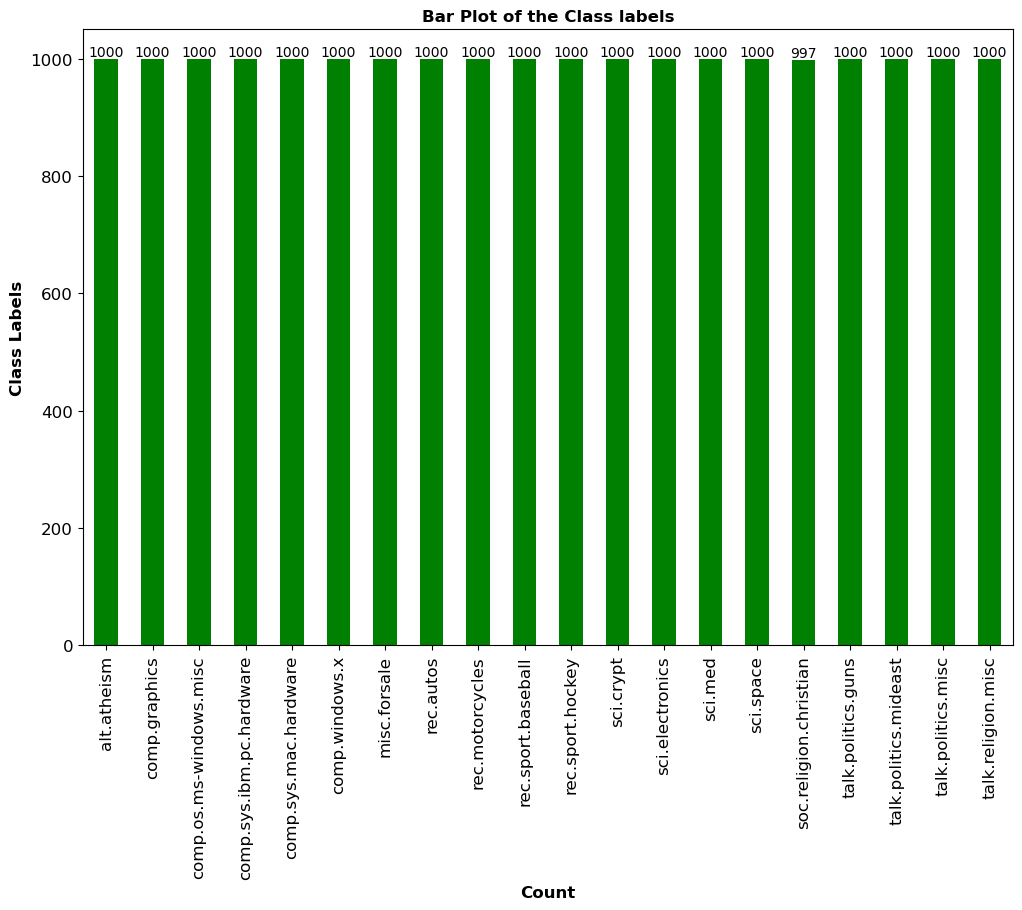

In [10]:
#Bar chart showing the counts of each class label

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax = pd.Series(dirs_labels).value_counts().sort_index().plot(kind='bar',color='green')

for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='edge')

plt.xticks(rotation = 90)    
plt.title("Bar Plot of the Class labels",fontweight='bold')
plt.xlabel("Count",fontsize=12,fontweight='bold')
plt.ylabel("Class Labels",fontsize=12,fontweight='bold')
plt.show()

**Observations:**<br>
From the above bar chart it is clear that<br>
* All the class labels has equal number of documents except for the soc.religion.christian class label.<br>
* soc.religion.christian class label has 997 documents while all the other class labels have 1000 documents.<br>
* We can say that the dataset is almost balanced one.

Figure 2

In [14]:
# Line chart showing the file size of the documents.

file_size = []
for root, dirs, files in os.walk(PATH, topdown=False):
  for name in files:
    x = os.path.join(root, name)
    file_size.append(os.path.getsize(x))

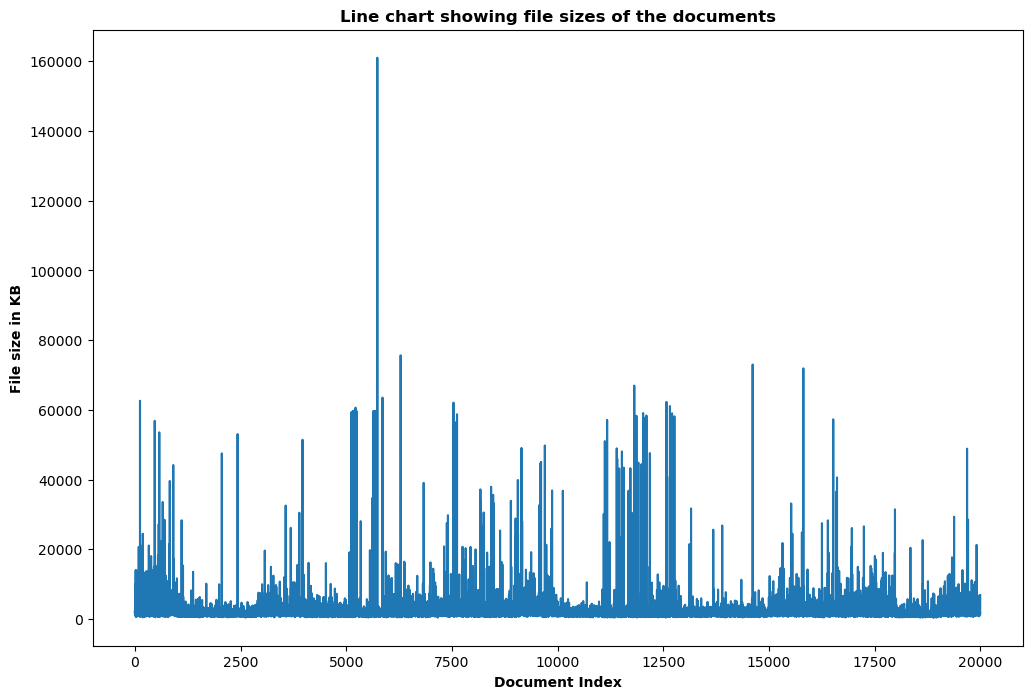

In [15]:
plt.figure(figsize=(12, 8))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


plt.title("Line chart showing file sizes of the documents",fontweight='bold')
plt.ylabel("File size in KB",fontsize=10,fontweight='bold')
plt.xlabel("Document Index",fontsize=10,fontweight='bold')
plt.plot(file_size)
plt.show()

**Observations:**<br>
From the above line chart it can be observed that the <br>
* Most of the documents have file size of less than 20000 bytes.<br>
* The maximum file size is observed to be 160000 bytes.

* Data source - *https://archive.ics.uci.edu/dataset/113/twenty+newsgroups* <br>

* Data size (MB, GB, etc.) - 46 MB approx.<br>
* Data shape (# of rows and # columns) - It does not contain data in the form of rows and columns rather data is present in the form text files (.txt format)<br>